In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#importing manager csv
female_labor = pd.read_csv('Data/labor_participation.csv')
female_labor.head()

,country,country_code,new_code,latitude,longitude,indicator_name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,AW,12.521110,-69.968338,labor force participation rate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,AF,33.939110,67.709953,labor force participation rate,14.938000,14.935000,15.339000,15.850000,16.764999,17.735001,18.760000,19.840000,20.973000,21.416000,21.594999
2,Angola,AGO,AO,-11.202692,17.873887,labor force participation rate,75.695999,75.766998,75.850998,75.910004,75.971001,76.018997,76.065002,76.108002,76.129997,76.141998,76.136002
3,Albania,ALB,AL,41.153332,20.168331,labor force participation rate,45.001999,45.761002,46.514999,47.370998,43.311001,43.297001,46.102001,46.451000,46.794998,46.799000,46.712002
4,Andorra,AND,AD,42.546245,1.601554,labor force participation rate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
#removing additional years
female_labor_2019=female_labor[["new_code", "2019"]]
female_labor_2019.head()

,new_code,2019
0,AW,0.000000
1,AF,21.594999
2,AO,76.136002
3,AL,46.712002
4,AD,0.000000


In [6]:
#renaming 2019

female_labor_2019_final=female_labor_2019.rename(columns = {
    "2019" :"labor"
})
female_labor_2019_final.head()

,new_code,labor
0,AW,0.000000
1,AF,21.594999
2,AO,76.136002
3,AL,46.712002
4,AD,0.000000


In [7]:
#importing parliament
female_parliament = pd.read_csv('Data/parliament_seats.csv')
female_parliament.head()

,country,country_code,new_code,latitude,longitude,indicator_name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,ALB,AL,41.153332,20.168331,parliament,16.428571,16.428571,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197
1,Algeria,DZA,DZ,28.033886,1.659626,parliament,7.712082,7.712082,7.969152,31.601732,31.601732,31.601732,31.601732,31.601732,25.757576,25.757576,25.757576
2,Andorra,AND,AD,42.546245,1.601554,parliament,35.714286,35.714286,50.000000,50.000000,50.000000,50.000000,39.285714,32.142857,32.142857,32.142857,46.428571
3,Angola,AGO,AO,-11.202692,17.873887,parliament,38.636364,38.636364,38.181818,34.090909,34.090909,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000
4,Antigua and Barbuda,ATG,AG,17.060816,-61.796428,parliament,10.526316,10.526316,10.526316,10.526316,10.526316,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111


In [8]:
#reducing columns
female_parliament_2019=female_parliament[["new_code", "2019"]]
female_parliament_2019.head()

,new_code,2019
0,AL,29.508197
1,DZ,25.757576
2,AD,46.428571
3,AO,30.000000
4,AG,11.111111


In [9]:
#renaming 2019
female_parliament_2019_final=female_parliament_2019.rename(columns = {
    "2019" :"parliament"
})
female_parliament_2019_final.head()


,new_code,parliament
0,AL,29.508197
1,DZ,25.757576
2,AD,46.428571
3,AO,30.000000
4,AG,11.111111


In [10]:
labor_regression=pd.merge(female_parliament_2019_final, female_labor_2019_final, how='inner', on=["new_code", "new_code"])

In [12]:
labor_regression

,new_code,parliament,labor
0,AL,29.508197,46.712002
1,DZ,25.757576,14.591000
2,AD,46.428571,0.000000
3,AO,30.000000,76.136002
4,AG,11.111111,0.000000
...,...,...,...
129,UZ,16.000000,52.377998
130,VU,0.000000,60.956001
131,VN,26.720648,72.708000
132,ZM,17.964072,70.370003


In [14]:
X = labor_regression["parliament"].values.reshape(-1, 1)
y = labor_regression["labor"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (134, 1) (134, 1)


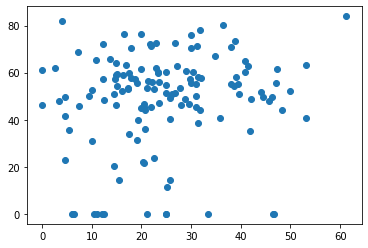

In [15]:
plt.scatter(X,y)

In [16]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.27225992]]
y-axis intercept:  [41.54832466]


In [19]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[61.25]]


In [20]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5, 1.0, 'Female Labor Participation')

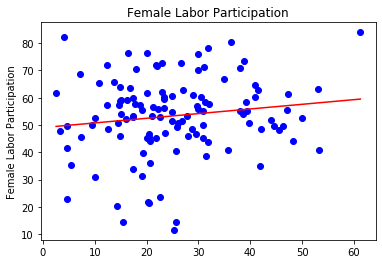

In [33]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
#plt.xlabel('your xlabel')
plt.ylabel('Female Labor Participation')
plt.title('Female Labor Participation')

In [22]:
#trying the above but removing counties with 0 for both
labor_regression2=labor_regression[(labor_regression["parliament"]>0)]
labor_regression_final=labor_regression2[(labor_regression2["labor"]>0)]
labor_regression_final

,new_code,parliament,labor
0,AL,29.508197,46.712002
1,DZ,25.757576,14.591000
3,AO,30.000000,76.136002
5,AM,23.484848,47.074001
6,AU,30.463576,60.299999
...,...,...,...
128,UY,19.191919,55.578999
129,UZ,16.000000,52.377998
131,VN,26.720648,72.708000
132,ZM,17.964072,70.370003


In [25]:
X = labor_regression_final["parliament"].values.reshape(-1, 1)
y = labor_regression_final["labor"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (119, 1) (119, 1)


In [26]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [27]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.17033089]]
y-axis intercept:  [49.0543412]


In [29]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2.54237288]]
Max X Value: [[61.25]]


In [30]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5, 1.0, 'Female Managers')

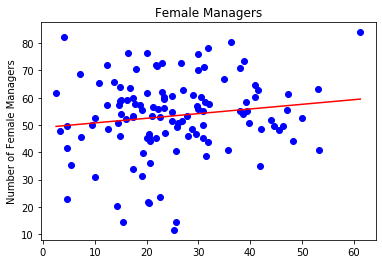

In [31]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
#plt.xlabel('your xlabel')
plt.ylabel('Number of Female Managers')
plt.title('Female Managers')